In [1]:
import pandas as pd
fish = pd.read_csv('data/fish.csv')

In [2]:
#입력 및 타깃 데이터 생성
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
#훈련세트와 테스트 세트로 나눈다
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42
)

In [4]:
#특성을 표준화처리 (단위가 다르면 올바르게 성능이 나오지 않으므로)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input) #훈련세트 데이터로만 훈련
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [11]:
#SGDClassifier클래스로 확률적 경사 하강법 사용
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=100, random_state=42)
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=100, random_state=42)

In [12]:
#점수 출력
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.8


In [13]:
sc.partial_fit(train_scaled, train_target) #기존의 데이터를 새로운 데이터로 인식해 다시 돌게 됨
 
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.907563025210084
0.925


In [15]:
#그래프 그리기
import numpy as np

sc = SGDClassifier(loss = 'log', random_state = 42) #로지스틱 손실 사용

#점수를 저장할 리스트
train_score = [] 
test_score = []
classes = np.unique(train_target) #타겟의 목록 생성

#300번의 에포크동안 훈련 반복 + 점수 기록
for _ in range(0, 300): # _ : 변수명
    sc.partial_fit(train_scaled, train_target, classes = classes) #classes로 목록을 넣어서 어떤 것들이 있는지 알려준다
   
    train_score.append(sc.score(train_scaled, train_target)) #점수를 내서 train_score에 저장한다
    test_score.append(sc.score(test_scaled, test_target))

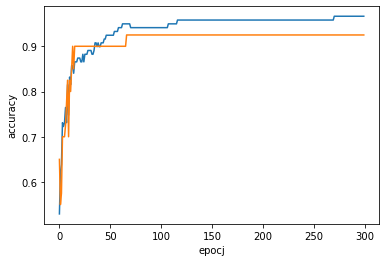

In [16]:
import matplotlib.pyplot as plt

plt.plot(train_score, label = 'train')
plt.plot(test_score, label = 'test')
plt.legend #범례
plt.xlabel("epocj") #에포크
plt.ylabel("accuracy") #정확도
plt.show()

In [17]:
#100으로 맞추고 모델을 다시 훈련
sc = SGDClassifier(loss='log', max_iter=100, tol = None, random_state=42) #None으로 지정하면 자동으로 멈추지 않고 100만큼 반복함
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
